In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
from google.colab import files
uploaded = files.upload()

Saving life expectancy.csv to life expectancy.csv


In [3]:
data = pd.read_csv('/content/life expectancy.csv')

In [5]:
data.head(5)

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.0,NaN,NaN,10.809000,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.0,4.483516,NaN,4.004000,NaN,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.0,7.139524,3.4587,18.575001,NaN,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.0,5.865939,NaN,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.0,2.484370,NaN,2.493000,NaN,NaN,144678.14,65271.91,481740.70


In [6]:
data.dtypes

,0
Country Name,object
Country Code,object
Region,object
IncomeGroup,object
Year,int64
Life Expectancy World Bank,float64
Prevelance of Undernourishment,float64
CO2,float64
Health Expenditure %,float64
Education Expenditure %,float64


In [7]:
data.shape

(3306, 16)

In [8]:
data.isnull().sum()

,0
Country Name,0
Country Code,0
Region,0
IncomeGroup,0
Year,0
Life Expectancy World Bank,188
Prevelance of Undernourishment,684
CO2,152
Health Expenditure %,180
Education Expenditure %,1090


In [9]:
# 1. Remove columns with too many missing values (if more than 50% missing)
data.dropna(axis=1, thresh=len(data) * 0.5, inplace=True)
print("Columns with many missing values removed:", data.shape)

Columns with many missing values removed: (3306, 15)


In [10]:
# 2. Using Mean imputation for 'Health Expenditure %' and 'Education Expenditure %' columns
data['Health Expenditure %'].fillna(data['Health Expenditure %'].mean(), inplace=True)
data['Education Expenditure %'].fillna(data['Education Expenditure %'].mean(), inplace=True)

In [11]:
# 3. Using Median imputation for 'Unemployment' column
data['Unemployment'].fillna(data['Unemployment'].median(), inplace=True)

In [12]:
# 4. Using mode imputation for the "Prevalence of Undernourishment" column
data["Prevelance of Undernourishment"].fillna(data["Prevelance of Undernourishment"].mode()[0], inplace=True)

In [13]:
# 5. Fill missing values based on Region or IncomeGroup averages (group-based imputation)
data['Sanitation'] = data.groupby('Region')['Sanitation'].transform(lambda x: x.fillna(x.mean()))

In [14]:
# 6. Interpolating missing values for Life Expectancy World Bank
data['Life Expectancy World Bank'] = data['Life Expectancy World Bank'].interpolate()
data['CO2'] = data['CO2'].interpolate()

In [15]:
data.isnull().sum()

,0
Country Name,0
Country Code,0
Region,0
IncomeGroup,0
Year,0
Life Expectancy World Bank,0
Prevelance of Undernourishment,0
CO2,0
Health Expenditure %,0
Education Expenditure %,0


In [16]:
data.describe()

,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Sanitation,Injuries,Communicable,NonCommunicable
count,3306.000000,3306.000000,3306.000000,3.306000e+03,3306.000000,3306.000000,3306.000000,3306.000000,3.306000e+03,3.306000e+03,3.306000e+03
mean,2010.000000,69.750980,8.974622,1.516662e+05,6.364059,4.589014,7.709541,46.327720,1.318219e+06,4.686289e+06,7.392488e+06
std,5.478054,9.233615,10.580639,7.552286e+05,2.764345,1.734866,6.002558,27.770068,5.214068e+06,1.843727e+07,2.932688e+07
min,2001.000000,40.369000,2.500000,1.000000e+01,1.263576,0.850320,0.100000,2.377647,4.304900e+02,3.301600e+02,2.481820e+03
25%,2005.000000,63.802250,2.500000,2.180000e+03,4.304727,3.698569,3.906250,18.772260,6.245688e+04,5.776475e+04,3.184758e+05
50%,2010.000000,72.119037,3.700000,9.890000e+03,6.146391,4.589014,5.920000,38.992948,2.456910e+05,3.147693e+05,1.350146e+06
75%,2015.000000,76.519000,11.600000,5.707750e+04,8.001557,4.922585,9.500750,71.614850,8.465591e+05,2.831636e+06,3.918468e+06
max,2019.000000,84.356341,70.900000,1.070722e+07,24.230680,23.270000,37.250000,100.000004,5.563676e+07,2.685646e+08,3.246378e+08


In [19]:
#Z-Score Method
data['Health Expenditure Z'] = stats.zscore(data['Health Expenditure %'])
outliers_health_expenditure = data[data['Health Expenditure Z'].abs() > 3]
outliers_health_expenditure

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Sanitation,Injuries,Communicable,NonCommunicable,Health Expenditure Z
100,Marshall Islands,MHL,East Asia & Pacific,Upper middle income,2001,74.047293,2.5,1.100000e+02,16.352001,4.589014,5.920,51.168487,2622.02,6231.20,11006.56,3.613678
120,Nauru,NRU,East Asia & Pacific,High income,2001,70.818841,2.5,8.000000e+01,15.502267,4.589014,5.920,51.168487,808.33,1606.13,2878.31,3.306241
161,Tuvalu,TUV,East Asia & Pacific,Upper middle income,2001,62.429500,2.5,1.000000e+01,19.188749,4.589014,5.920,4.741817,442.40,977.15,2804.71,4.640025
509,Tuvalu,TUV,East Asia & Pacific,Upper middle income,2003,63.354000,2.5,1.000000e+01,15.418582,4.589014,5.920,4.742906,434.47,888.12,2818.13,3.275963
622,Marshall Islands,MHL,East Asia & Pacific,Upper middle income,2004,74.420280,2.5,1.300000e+02,17.257412,4.589014,5.920,51.168487,2728.41,5976.68,11808.04,3.941259
796,Marshall Islands,MHL,East Asia & Pacific,Upper middle income,2005,74.498780,2.5,1.400000e+02,21.955164,4.589014,5.920,51.168487,2748.09,5861.95,12053.67,5.640925
970,Marshall Islands,MHL,East Asia & Pacific,Upper middle income,2006,74.595561,2.5,1.400000e+02,22.024164,4.589014,5.920,51.168487,2766.88,5698.67,12314.31,5.665890
1036,United States,USA,North America,High income,2006,77.687805,2.5,5.653080e+06,14.718342,4.589014,4.620,97.892650,9483908.40,5174840.41,78323856.88,3.022613
1144,Marshall Islands,MHL,East Asia & Pacific,Upper middle income,2007,74.527500,2.5,1.400000e+02,18.067039,4.589014,5.920,51.168487,2757.07,5523.11,12481.40,4.234186
1164,Nauru,NRU,East Asia & Pacific,High income,2007,73.205610,2.5,4.000000e+01,24.230680,4.246150,5.920,51.168487,783.70,1484.58,2824.78,6.464216


In [20]:
#ICR Method
Q1 = data['CO2'].quantile(0.25)
Q3 = data['CO2'].quantile(0.75)
IQR = Q3 - Q1
outliers_CO2 = data[(data['CO2'] < (Q1 - 1.5 * IQR)) | (data['CO2'] > (Q3 + 1.5 * IQR))]
outliers_CO2

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Sanitation,Injuries,Communicable,NonCommunicable,Health Expenditure Z
9,Australia,AUS,East Asia & Pacific,High income,2001,79.634146,2.5,3.456400e+05,7.696229,4.589014,6.740000,58.788894,612233.81,208282.73,4.158053e+06,0.481984
24,Brazil,BRA,Latin America & Caribbean,Upper middle income,2001,70.462000,10.7,3.193800e+05,8.549606,3.844680,9.610000,36.167624,9266898.86,13885996.63,3.622144e+07,0.790740
29,Canada,CAN,North America,High income,2001,79.339024,2.5,5.066200e+05,8.624824,4.953030,7.220000,77.575810,818908.60,374249.31,6.667095e+06,0.817954
32,China,CHN,East Asia & Pacific,Upper middle income,2001,71.732000,10.0,3.529080e+06,4.253299,4.589014,3.800000,13.491349,47557278.81,50025776.40,2.754737e+08,-0.763682
40,Germany,DEU,Europe & Central Asia,High income,2001,78.329268,2.5,8.476800e+05,9.920462,4.589014,7.770000,95.813326,2057820.12,879257.00,2.316467e+07,1.286721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3287,Thailand,THA,East Asia & Pacific,Upper middle income,2019,77.150000,8.0,2.670900e+05,3.789121,2.968980,0.720000,25.607814,2558536.21,2598556.82,1.541218e+07,-0.931623
3296,Ukraine,UKR,Europe & Central Asia,Lower middle income,2019,71.827317,2.6,1.747300e+05,7.098602,5.441300,8.190000,71.977338,2677198.11,1279508.70,1.761006e+07,0.265761
3298,United States,USA,North America,High income,2019,78.787805,2.5,4.817720e+06,16.767063,4.589014,3.670000,98.275223,10129022.26,4968922.31,9.597652e+07,3.763849
3300,Vietnam,VNM,East Asia & Pacific,Lower middle income,2019,75.400000,6.2,3.364900e+05,5.249656,4.061970,2.040000,51.168487,3100141.17,3281846.28,1.942952e+07,-0.403196


In [22]:
#capping
data['CO2'] = data['CO2'].clip(lower=data['CO2'].quantile(0.01), upper=data['CO2'].quantile(0.99))
data['Health Expenditure %'] = data['Health Expenditure %'].clip(lower=data['Health Expenditure %'].quantile(0.01),
                                                                 upper=data['Health Expenditure %'].quantile(0.99))

In [23]:
# data consistency
data['Year'] = data['Year'].astype(int)
data['Health Expenditure %'] = data['Health Expenditure %'].apply(lambda x: x*100 if x < 1 else x)
data['CO2'] = data['CO2'].apply(lambda x: x * 1000 if x < 1000 else x)
data.drop_duplicates(inplace=True)

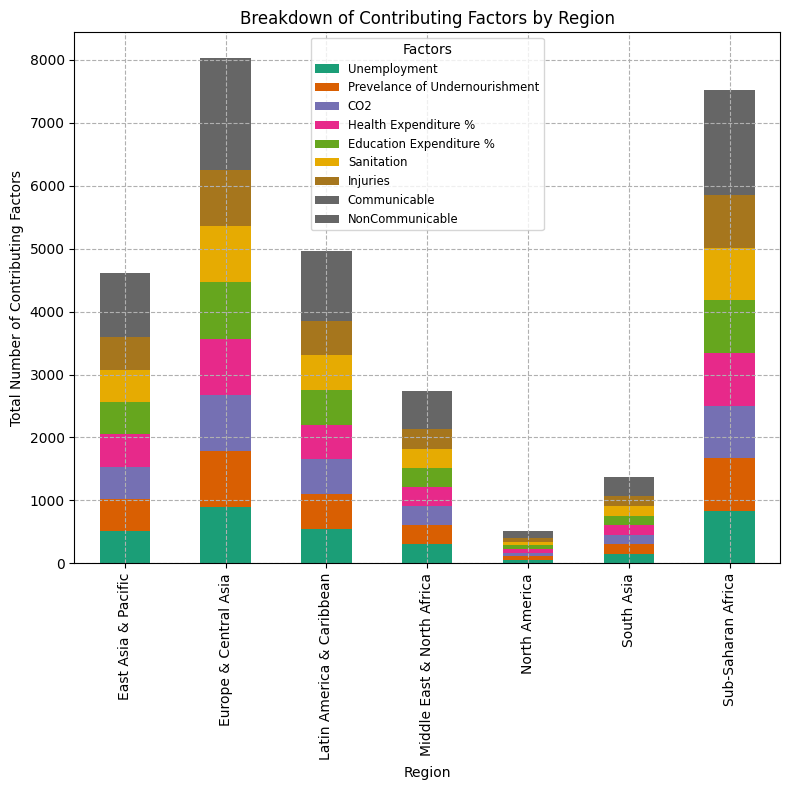

In [25]:
# New factors list without corruption
factors2 = ['Unemployment', 'Prevelance of Undernourishment', 'CO2', 'Health Expenditure %',
           'Education Expenditure %', 'Sanitation', 'Injuries', 'Communicable', 'NonCommunicable']

# Group data by Region and count the total for each contributing factor
grouped_data2 = data.groupby('Region')[factors2].count()

# Plot a stacked bar chart
grouped_data2.plot(kind='bar', stacked=True, figsize=(8, 8), colormap='Dark2')

# Label axes
plt.xlabel('Region')
plt.ylabel('Total Number of Contributing Factors')

# Add grid, legend, and layout adjustment
plt.title('Breakdown of Contributing Factors by Region')
plt.legend(fontsize="small", title="Factors")
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()


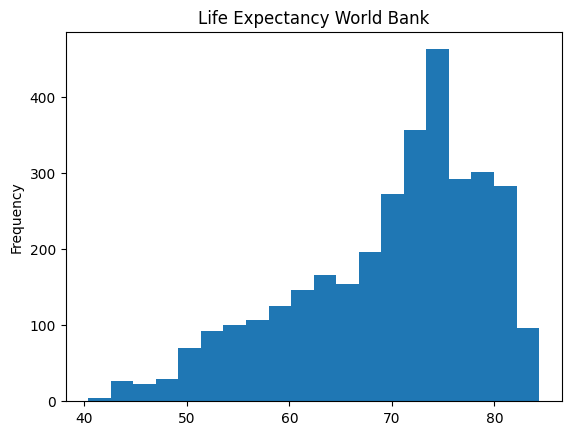

In [26]:
# Histogram of Life Expectancy by Frequency in the dataset

data['Life Expectancy World Bank'].plot(kind='hist', bins=20, title='Life Expectancy World Bank')
plt.show()

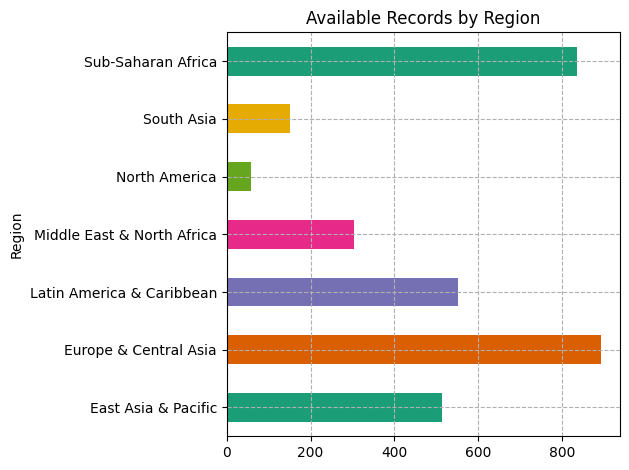

In [27]:
# Plot showing the total number of records available for each region
data.groupby('Region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

plt.title('Available Records by Region')
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()

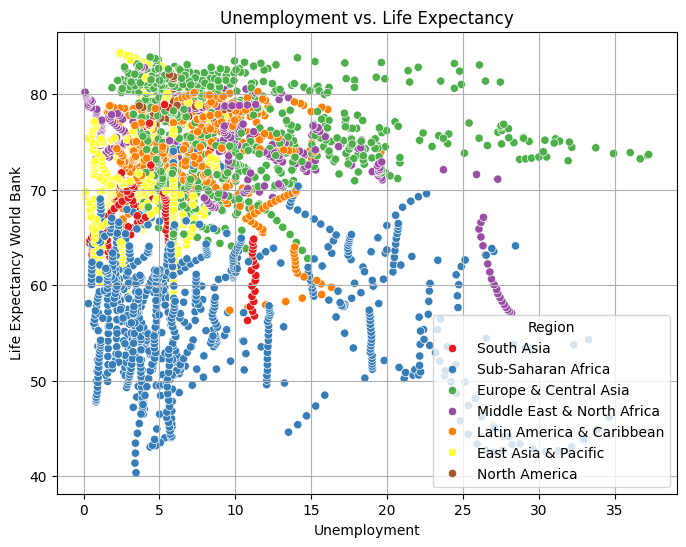

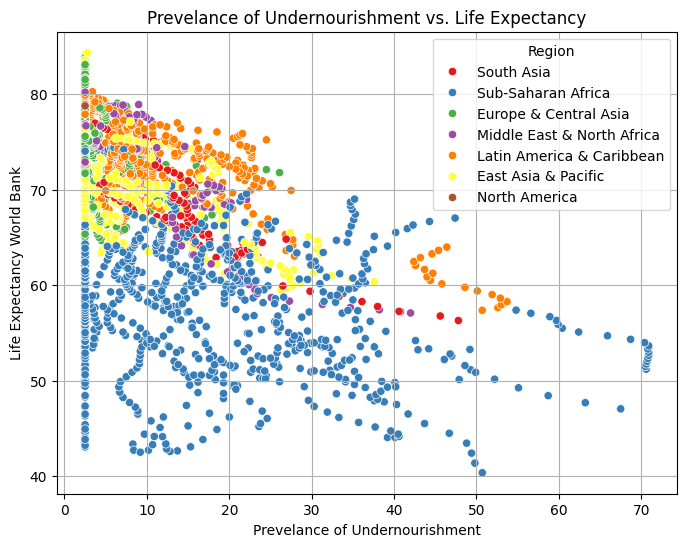

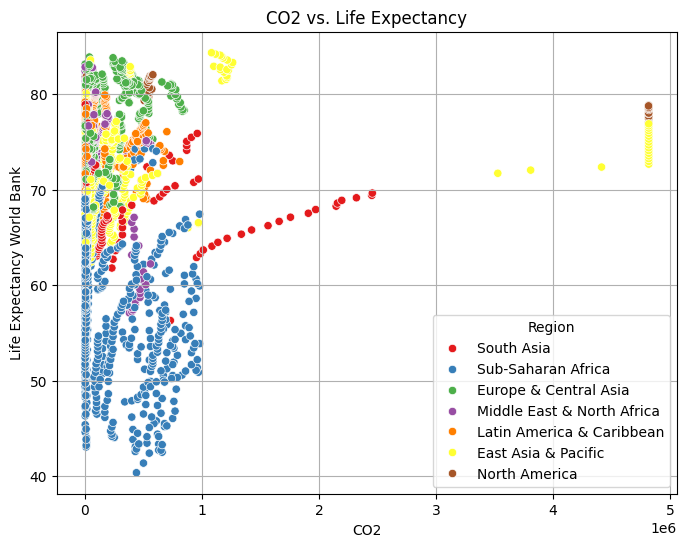

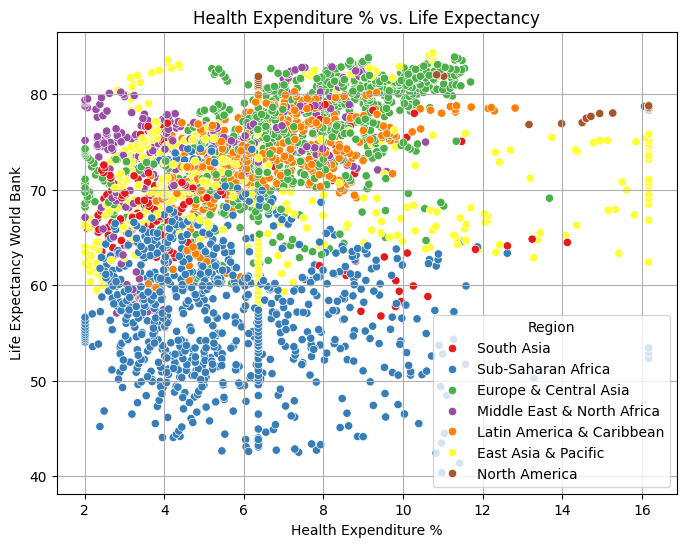

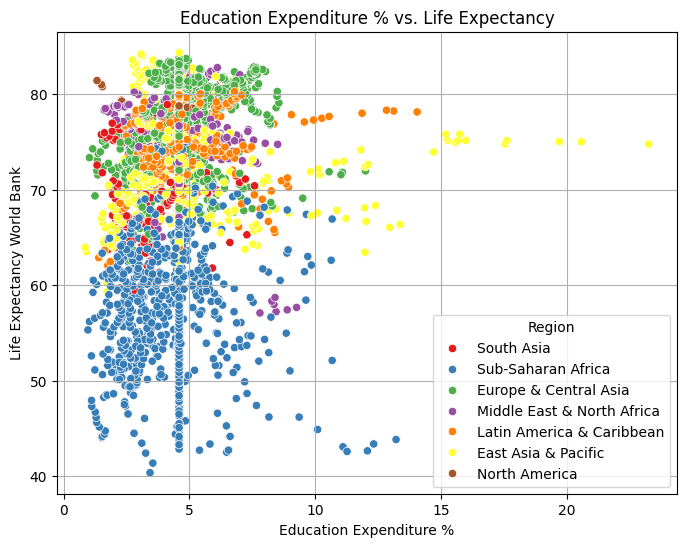

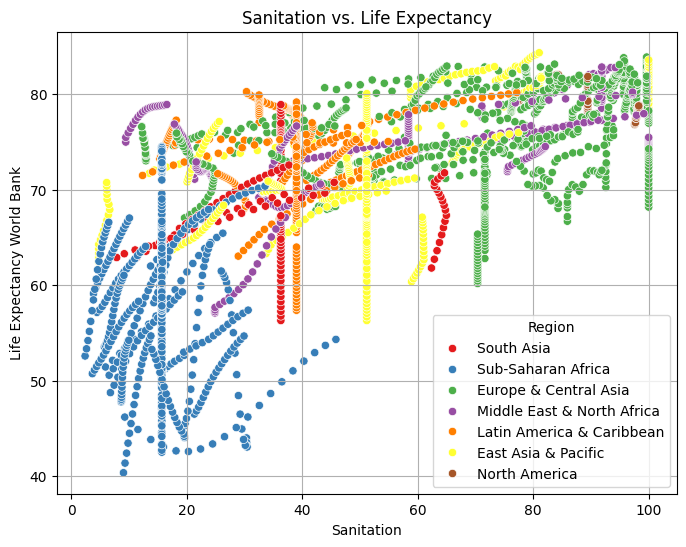

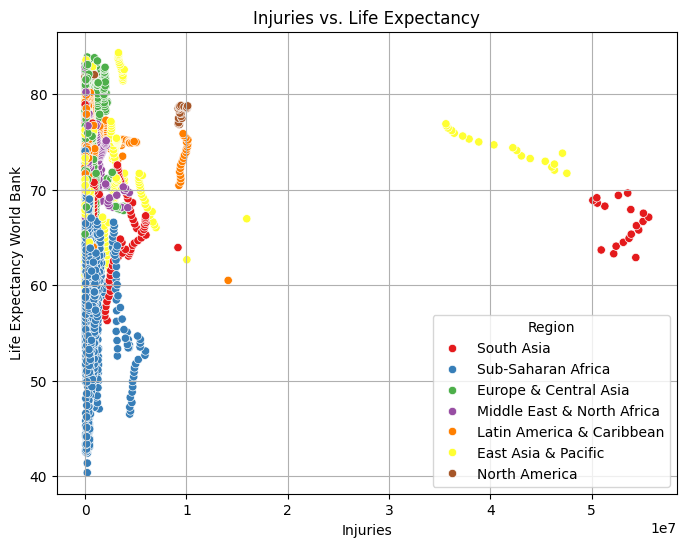

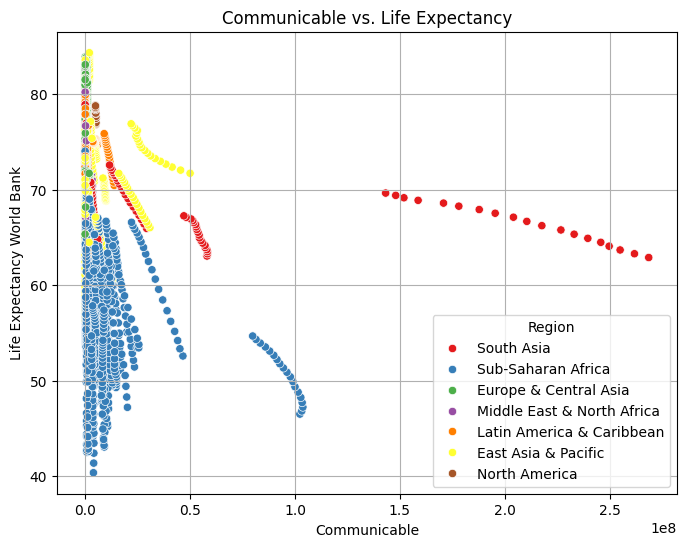

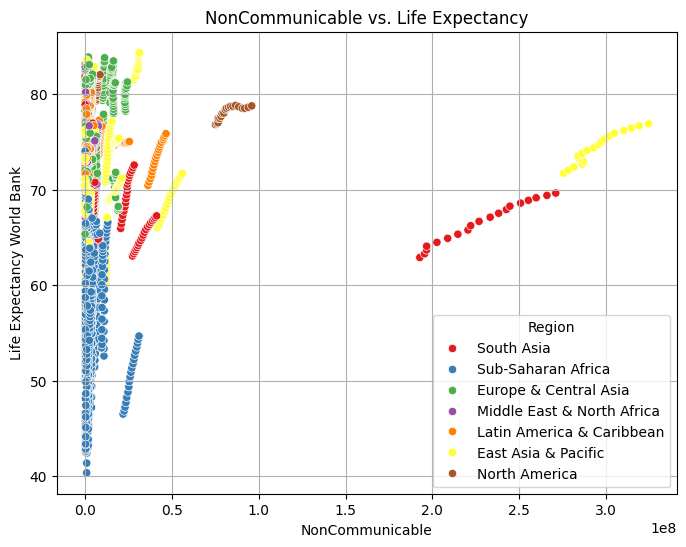

In [29]:
# List of factors
factors = ['Unemployment', 'Prevelance of Undernourishment', 'CO2', 'Health Expenditure %',
           'Education Expenditure %', 'Sanitation', 'Injuries', 'Communicable', 'NonCommunicable']

# Loop through each factor and create scatter plots against Life Expectancy World Bank
for factor in factors:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=factor, y='Life Expectancy World Bank', hue='Region', palette='Set1')

    # Add labels and title
    plt.xlabel(factor)
    plt.ylabel('Life Expectancy World Bank')
    plt.title(f'{factor} vs. Life Expectancy')
    plt.grid(True)


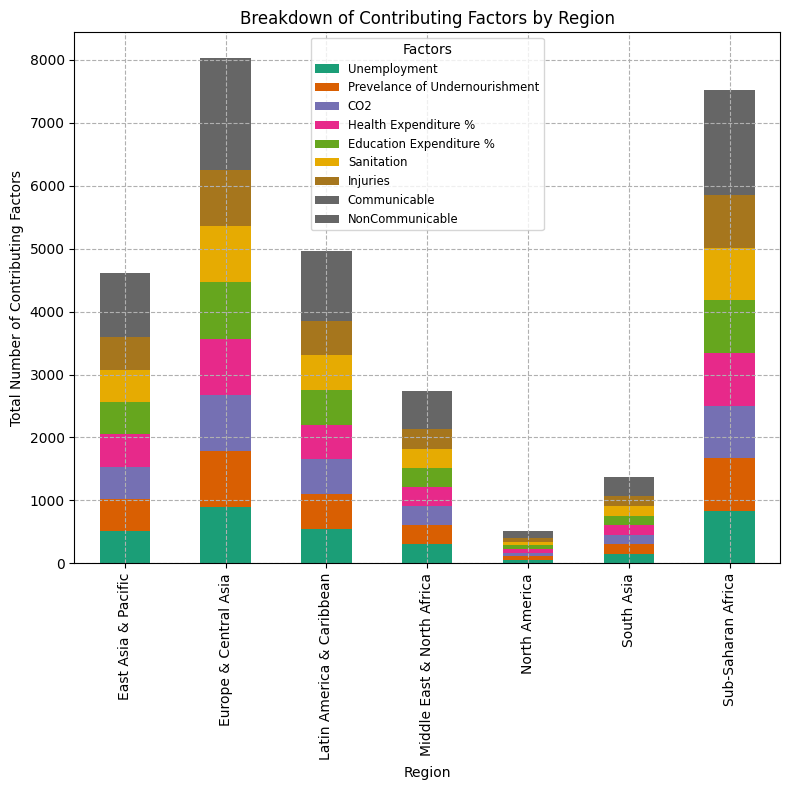

In [30]:
# Group data by Region and count the total for each contributing factor
grouped_data = data.groupby('Region')[factors].count()

# Plot a stacked bar chart
grouped_data.plot(kind='bar', stacked=True, figsize=(8, 8), colormap='Dark2')

# Label axes
plt.xlabel('Region')
plt.ylabel('Total Number of Contributing Factors')

# Add grid, legend, and layout adjustment
plt.title('Breakdown of Contributing Factors by Region')
plt.legend(fontsize="small", title="Factors")
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()